In [1]:
using Random
include("src/plotting_utils.jl")
include("src/guillotine_utils.jl")

sorted2midpoints (generic function with 1 method)

n=8
(p,q)=(4,1) i=5 j=8

v_cuts = [1 2; 1 1; 1 1; 2 1]
v_mins = [1; 1; 1; 1;;]
v_argmax = CartesianIndex(1, 1)
v_max = 1

h_cuts = [-1 -1; 1 2; 2 3; 1 2; 1 2; 2 1; 2 1]
h_mins = [-1; 1; 2; 1; 1; 1; 1;;]
h_argmax = CartesianIndex(3, 1)
h_max = 2

mini = [1, 1, 2]
C[p,q,i,j] = 2
argcuts[p,q,i,j] = 3
idxcuts[p,q,i,j] = 3

C[1,1,n,n]=1


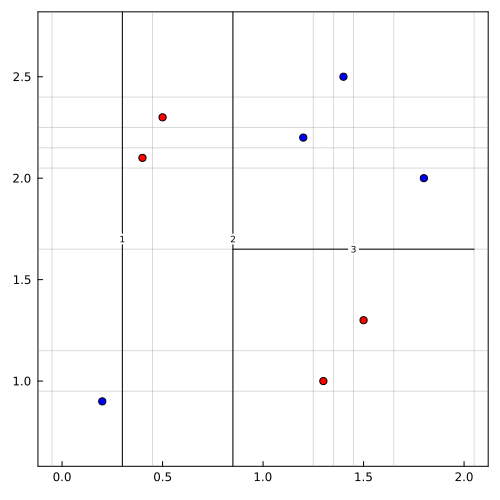

In [16]:
# Data generation ########################################################################

S = [
    0.5 2.3
    0.4 2.1
    0.2 0.9
    1.2 2.2
    1.4 2.5
    1.8 2.0
    1.5 1.3
    1.3 1.0
]

n = size(S)[1]
println("n=$n")

w = [1,1,-1,-1,-1,-1,1,1]

# Utils ##################################################################################
sortperm_x = sortperm(S[:, 1])
sorted_x = S[sortperm_x, 1]
midpoints_x = sorted2midpoints(sorted_x)

sortperm_y = sortperm(S[:, 2])
sorted_y = S[sortperm_y, 2]
midpoints_y = sorted2midpoints(sorted_y)

Disc_pqij(p,q,i,j) = abs(sum(w[intersect(sortperm_x[p:p+i-1],sortperm_y[q:q+j-1])]))
Count_pqij(p,q,i,j) = length(intersect(sortperm_x[p:p+i-1],sortperm_y[q:q+j-1]))

# Initialization #########################################################################
inf = 100
C = 100*ones(Int,n,n,n,n)
P = zeros(Int,n,n,n,n)
D = zeros(Int,n,n,n,n)

# 0 --> not calculated!
# 1 --> Discepancy
# 2 --> Vertical
# 3 --> Horizontal
argcuts = zeros(Int,n,n,n,n)

# 0   --> not calculated! or Discepancy
# 1:n --> midpoint index of v or h cut
idxcuts = zeros(Int,n,n,n,n)

for p = 1:n
    for q = 1:n
        for i = 1:n-p+1
            for j = 1:n-q+1
                P[p,q,i,j] = Count_pqij(p,q,i,j)
                D[p,q,i,j] = Disc_pqij(p,q,i,j)
            end
        end
        if P[p,q,1,1] != 0
            C[p,q,1,1] = D[p,q,1,1]
        end
    end
end

open("test.txt","w") do io
    print_C_pyramid(C, "      Initialization C[p,q,i,j]",io)
    println(io,"\n.\n.\n.\n")
    print_C_pyramid(P, "                     P[p,q,i,j]",io)
    println(io,"\n.\n.\n.\n")
    print_C_pyramid(D, "                     D[p,q,i,j]",io)
end

#print_C_pyramid(C, "      Initialization C[p,q,i,j]")

for i = 1:n
    for j = 1:n
        if i+j > 2
            for p = 1:n-i+1
                for q = 1:n-j+1
                    # CREO QUE ESTE IF NO CAMBIA NADA; PERO EVITA HARTO CALCULO TRIVIAL
                    if P[p,q,i,j] != 0
                        
                        # vertical cut
                        if i > 1
                            v_cuts = [[C[p,q,s,j], C[p+s,q,i-s,j]][k] for s=1:i-1, k=1:2]
                            for s=1:i-1
                                if v_cuts[s,1]==inf || v_cuts[s,2]==inf
                                    v_cuts[s,:] = [-1, -1]
                                end
                            end
                            v_argmins = argmin(v_cuts, dims=2)
                            v_mins = v_cuts[v_argmins]
                            v_argmax = argmax(v_mins)
                            v_max = v_mins[v_argmax]
                        else
                            v_max = -1
                        end
                            
                        # horizontal cut
                        if j > 1
                            h_cuts =  [[C[p,q,i,t], C[p,q+t,i,j-t]][k] for t=1:j-1, k=1:2]
                            for t=1:j-1
                                if h_cuts[t,1]==inf || h_cuts[t,2]==inf
                                    h_cuts[t,:] = [-1, -1]
                                end
                            end
                            h_argmins = argmin(h_cuts, dims = 2)
                            h_mins = h_cuts[h_argmins]
                            h_argmax = argmax(h_mins)
                            h_max = h_mins[h_argmax]
                        else
                            h_max = -1
                        end                    
                        
                        mini = [D[p,q,i,j], v_max, h_max]
    
                        C[p,q,i,j] = maximum(mini)
                        argcuts[p,q,i,j] = argmax(mini)
                        if argcuts[p,q,i,j] == 2
                            idxcuts[p,q,i,j] = v_argmax[1]
                        elseif argcuts[p,q,i,j] == 3
                            idxcuts[p,q,i,j] = h_argmax[1]
                        end
                        
                        if p==4 && q==1 && i==5 && j==8
                            println("(p,q)=($p,$q) i=$i j=$j")
                            println("")
                            println("v_cuts = $v_cuts")
                            println("v_mins = $v_mins")
                            println("v_argmax = $v_argmax")
                            println("v_max = $v_max")
                            println("")
                            println("h_cuts = $h_cuts")
                            println("h_mins = $h_mins")
                            println("h_argmax = $h_argmax")
                            println("h_max = $h_max")
                            println("")
                            println("mini = $mini")
                            println("C[p,q,i,j] = $(C[p,q,i,j])")
                            println("argcuts[p,q,i,j] = $(argcuts[p,q,i,j])")
                            println("idxcuts[p,q,i,j] = $(idxcuts[p,q,i,j])")
                            println("")
                        end
                    end
                end
            end
        end
    end
end


#print_C_pyramid(argcuts, "                  argcuts[p,q,i,j]")

open("test.txt","a") do io
    print_C_pyramid(C, "               Final C[p,q,i,j]",io)
    println(io,"\n.\n.\n.\n")
    print_C_pyramid(argcuts, "               argcuts[p,q,i,j]",io)
    println(io,"\n.\n.\n.\n")
    print_C_pyramid(idxcuts, "               idxcuts[p,q,i,j]",io)
end


println("C[1,1,n,n]=$(C[1,1,n,n])")
fig = plot_rb_points(S, w)
plot_add_lines!(fig, S)
plot_guillotine_line!(fig,1,1,n,n)
fig